Es sabido que, una entidad que presta servicios o productos (pudiera ser una
empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de
cliente desarrollando productos personalizados en pos de las preferencias y
necesidades de cada uno de sus clientes.
El set de datos potencial contiene datos sobre clientes de una institución
financiera:

● Customer ID: ID asociado al cliente

● Age: Edad en años del cliente

● Income: Ingreso anual del cliente

● Family: Tamaño del grupo familiar del cliente

● CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito

● Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee
estudios especializadoss (magister, doctorado, etcétera)

● Mortgage: Monto de la hipoteca (0 indica que no posee)

● ZIP Code: Código postal del domicilio

En la última campaña a cada cliente se le ofreció un producto personalizado en
base a su comportamiento financiero, preferencias, capacidad de pago y
necesidades. La variable target corresponde a Personal Loan el cual indica si el
cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto ofrecido?), donde 0 indica que el cliente no adquirió el producto y 1 indica que
sí lo adquirió.

Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen
mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a
los clientes con dichas características y priorizarlos a ellos en las próximas
campañas.

a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué
columnas le hacen sentido incluir en un modelo para predecir si un cliente
tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde
que puede usar la función drop('nombre columna a eliminar', axis=1).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel('potencial.xlsx')
df.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,49,91107,4,1.6,1,0,0
1,2,45,34,90089,3,1.5,1,0,0
2,3,39,11,94720,1,1.0,1,0,0
3,4,35,100,94112,1,2.7,2,0,0
4,5,35,45,91330,4,1.0,2,0,0


In [3]:
df.shape

(5000, 9)

In [4]:
# ID como index
df.set_index('ID', inplace=True)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,,
1,25,49,91107,4,1.6,1,0,0
2,45,34,90089,3,1.5,1,0,0
3,39,11,94720,1,1.0,1,0,0
4,35,100,94112,1,2.7,2,0,0
5,35,45,91330,4,1.0,2,0,0


In [5]:
# eliminar columnas ZIP Code ya que no es relevante para el modelo
df.drop(['ZIP Code'], axis=1, inplace=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,
1,25,49,4,1.6,1,0,0
2,45,34,3,1.5,1,0,0
3,39,11,1,1.0,1,0,0
4,35,100,1,2.7,2,0,0
5,35,45,4,1.0,2,0,0


b) Determine cuáles son las variables predictoras que son categorías y obtenga
las variables dummies correspondientes para incluirlas en el modelo. Recuerde
que puede usar la función get_dummies() de pandas.

In [6]:
# variables categoricas
df.dtypes

Age                int64
Income             int64
Family             int64
CCAvg            float64
Education          int64
Mortgage           int64
Personal Loan      int64
dtype: object

<Axes: >

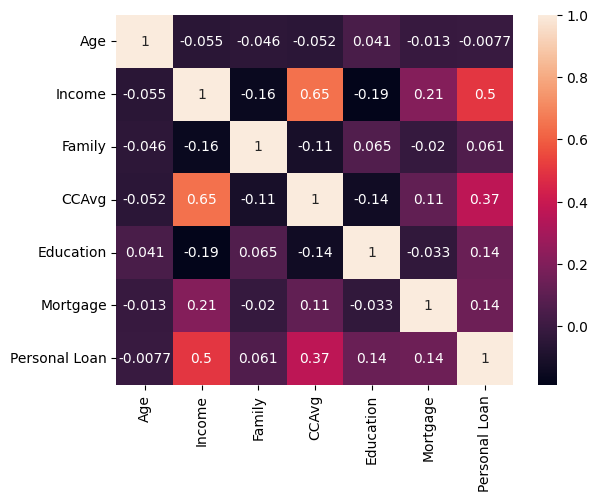

In [7]:
#  correlacion entre variables
sns.heatmap(df.corr(), annot=True)

Las variables que mas se correlacionan con la variable dependiente son Income, CCAvg y Education, lo que indica que son las variables mas relevantes para el modelo.

In [8]:
# get dummies
df = pd.get_dummies(df, columns=['Education'])
df.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3
ID,,,,,,,,,
1,25,49,4,1.6,0,0,True,False,False
2,45,34,3,1.5,0,0,True,False,False
3,39,11,1,1.0,0,0,True,False,False
4,35,100,1,2.7,0,0,False,True,False
5,35,45,4,1.0,0,0,False,True,False


c) Defina en un objeto X las variables predictoras y en Y la variable respuesta
Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción
5:1. Recuerde que la función train_test_split() es útil para realizar split simple,
además fije una semilla 2021 (random_state=2021 en la función
train_test_split()).

In [9]:
# definir las variables predictoras y la variable a predecir
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

d) Obtenga un árbol de decisión con el set de datos de entrenamiento. Obtenga
el MSE del modelo en el set de prueba. Muestre el árbol obtenido, ¿qué
observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué alternativas
pudieran probarse para abordar este problema?

In [10]:
# modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# MSE del modelo en el set de prueba
from sklearn.metrics import mean_squared_error

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del árbol de decisión:", mse)

MSE del árbol de decisión: 0.014


In [13]:
# acuraccy
accuracy_score(y_test, y_pred)

0.986

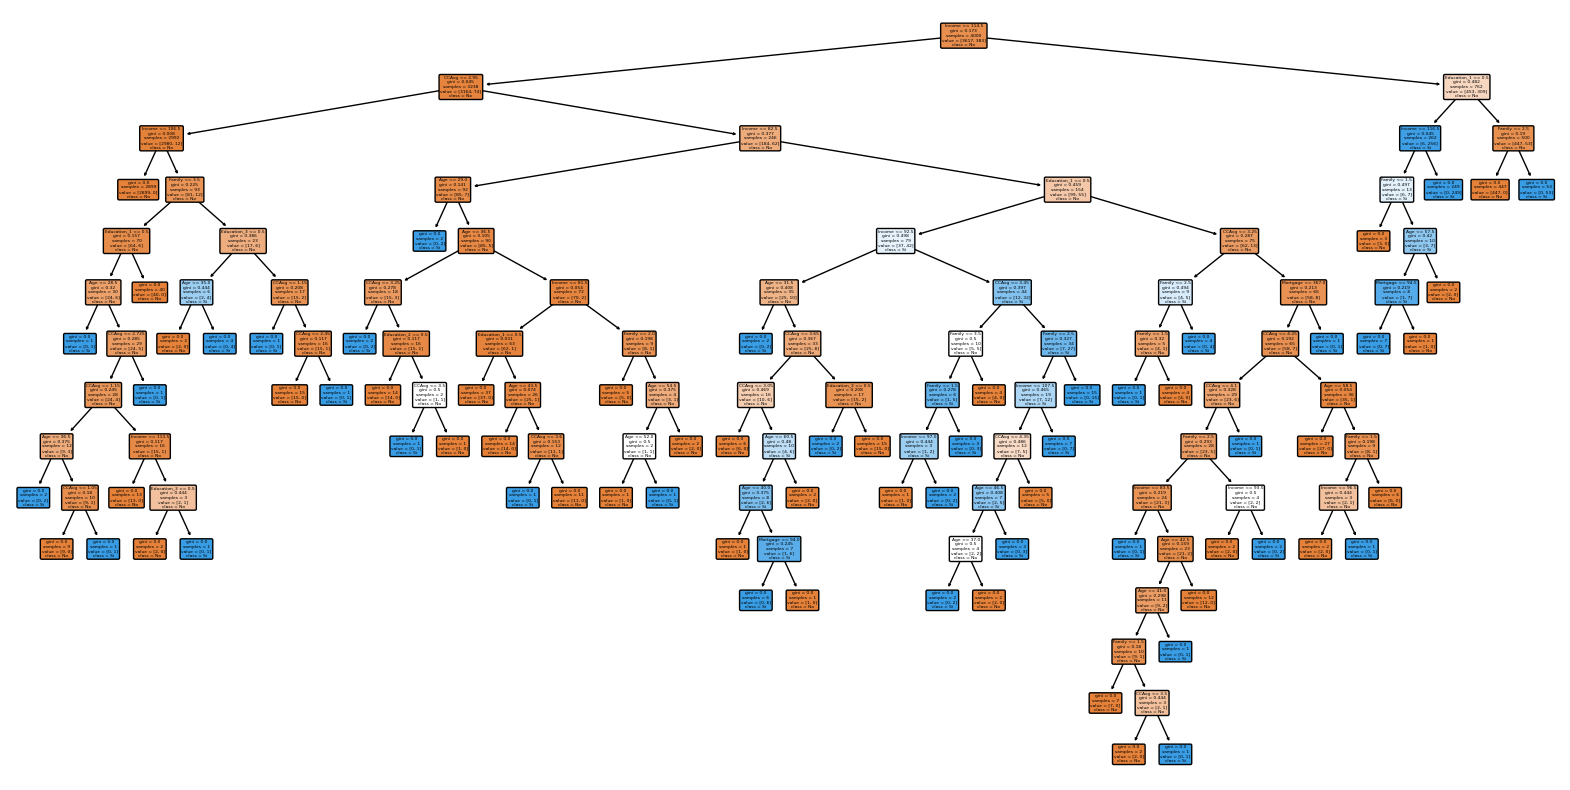

In [14]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns)
plt.show()

Observaciones:

Se observa que el arbol es muy grande y dificil de entender, esto se debe a que el modelo puede estar sobreajustado no es un buen modelo para predecir la variable dependiente.

Alternativas:

Se puede probar con otro modelo de arbol de decision, como por ejemplo el random forest se puede probar con otro modelo de clasificacion, como por ejemplo el gradient boosting.

e) Plantee otro árbol de decisión pero definiendo como parámetro de control
o prepoda la profundidad máxima del árbol, para esto en la función
DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad
máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo
anterior. Observe el árbol obtenido. Comente.

In [15]:
# modelo de poda
new_modelo = DecisionTreeClassifier(max_depth=2)
new_modelo.fit(X_train, y_train)

# MSE del modelo en el set de prueba
y_pred = new_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del árbol de decisión:", mse)

MSE del árbol de decisión: 0.031


In [16]:
# acuraccy
accuracy_score(y_test, y_pred)

0.969

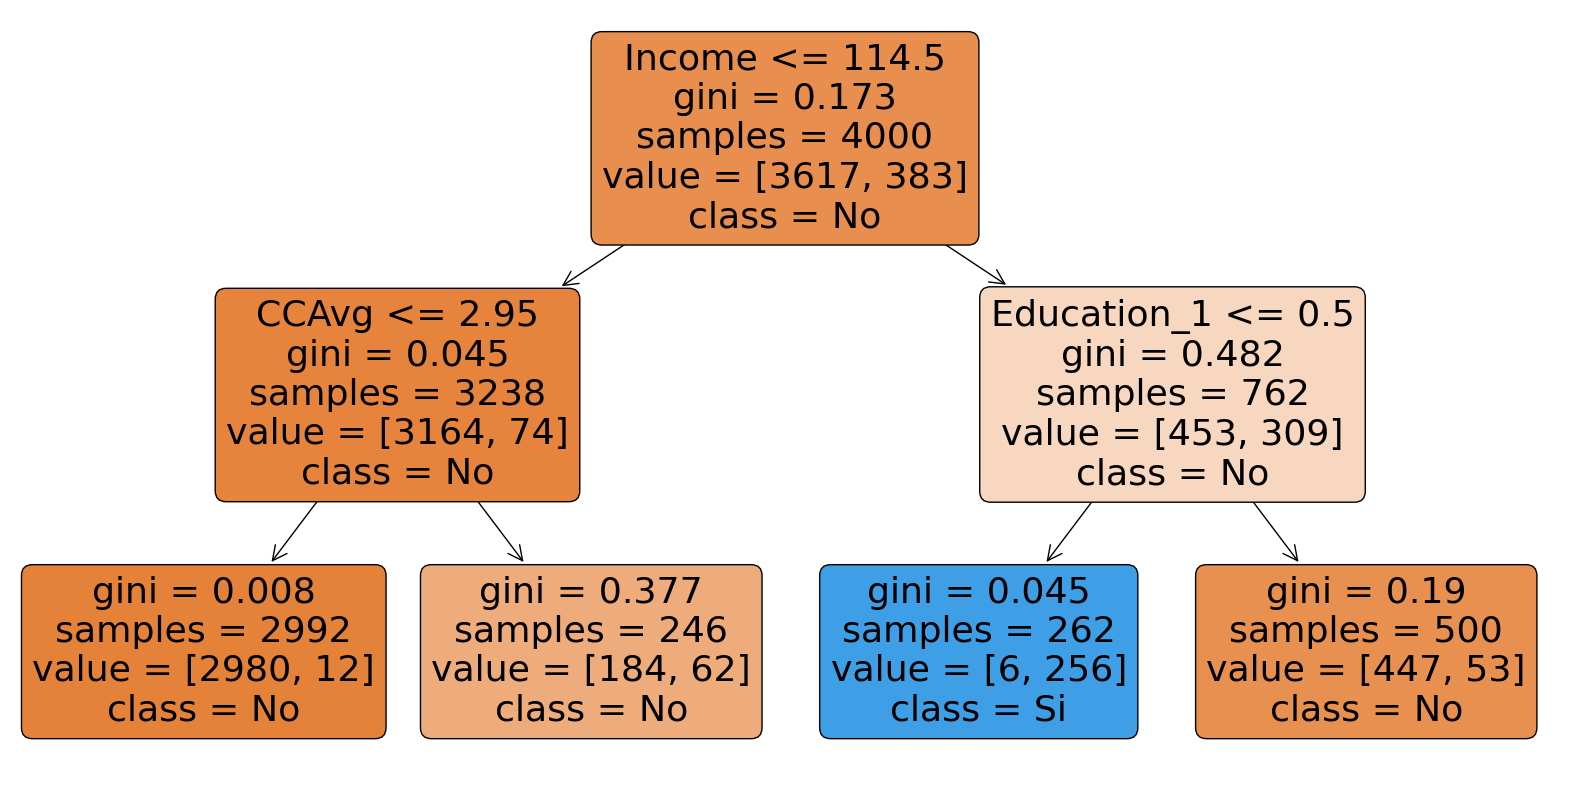

In [17]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(new_modelo, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns)
plt.show()

Observaciones:

Se observa que el arbol es mas pequeño y mas facil de entender al tener solo dos nuiveles de profundidad, con esto se evita el sobreajuste del modelo ya que el arbol no crece tanto.

El MSE es un poco más alto lo que indica que el modelo anterior es mejor, pero hay que considerra que el modelo anterior puede estar sobreajustado.

f) Busque los mejores valores de los criterios de corte y máxima profundidad
para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint:
evalue los hiperparámetros criterion y max_depth)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definimos los valores de los hiperparametros
criterion = ['gini', 'entropy'] # Criterio de corte
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Profundidad maxima del arbol

# Definimos el diccionario de los hiperparametros
hiperparametros = dict(criterion=criterion, max_depth=max_depth)

# Definir el clasificador del árbol de decisión
tree = DecisionTreeClassifier()

# Definimos la grilla
grid = GridSearchCV(tree, hiperparametros, cv=10, scoring='accuracy') # 10 validaciones cruzadas

# Ajustamos la grilla
grid.fit(X_train, y_train)

# Obtenemos los mejores hiperparametros
print('Mejores hiperparametros:', grid.best_params_)
print()

# Obtenemos el MSE del modelo en el set de prueba
Y_pred = grid.predict(X_test)
print('MSE del modelo en el set de prueba:', np.mean((y_test - y_pred)**2))
print()

# Obtenemos el accuracy del modelo en el set de prueba
print('Accuracy del modelo en el set de prueba:', accuracy_score(y_test, y_pred))
print()

Mejores hiperparametros: {'criterion': 'entropy', 'max_depth': 9}

MSE del modelo en el set de prueba: 0.031

Accuracy del modelo en el set de prueba: 0.969

